In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pwd

'D:\\flight\\Training'

In [3]:
data=pd.read_csv("Data_Train.csv")

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.rename(columns={'ï»¿Airline':'Airline'},inplace=True)

In [6]:
data.shape

(10683, 11)

In [7]:
#information of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
#Creating list of Category Columns

category=['Airline','Source','Destination','Additional_Info']


In [11]:
category

['Airline', 'Source', 'Destination', 'Additional_Info']

In [12]:
data.dropna(inplace=True)

In [13]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:


category_cols=data.select_dtypes(include=['object']).columns


In [15]:
category_cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [16]:
for i in category:
    print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


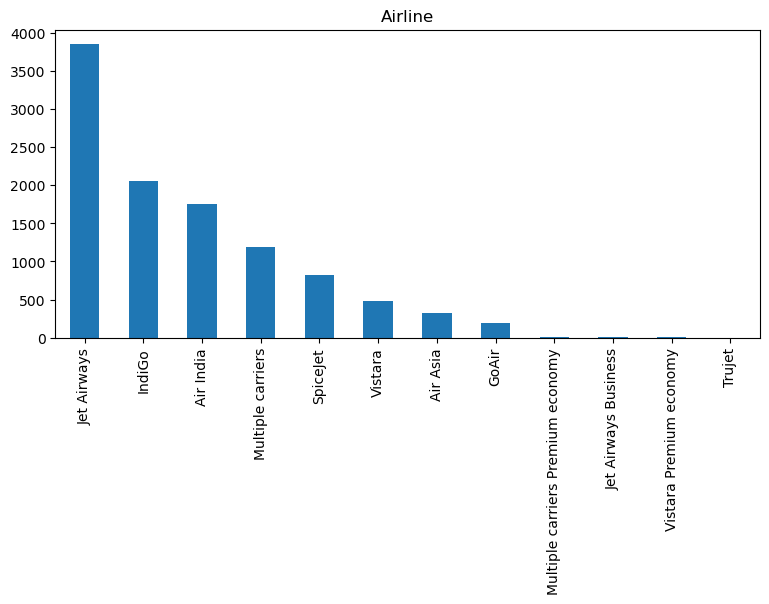

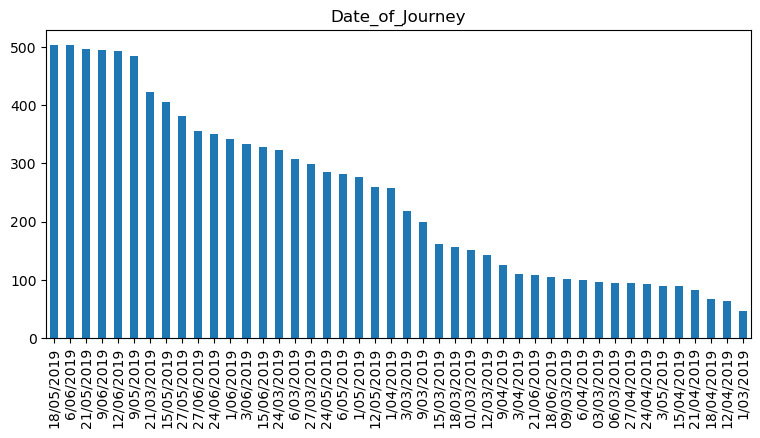

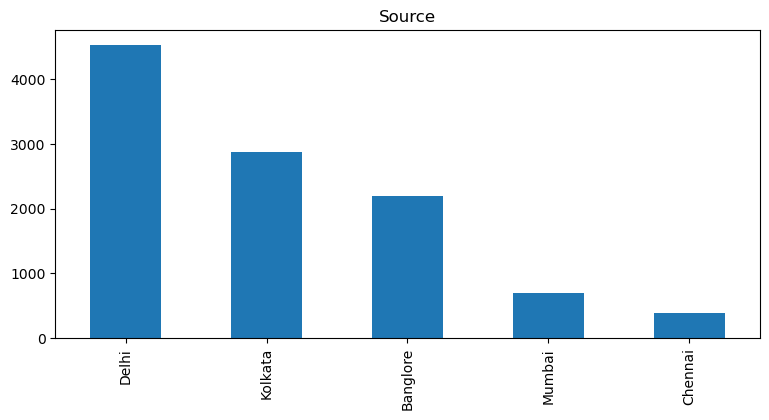

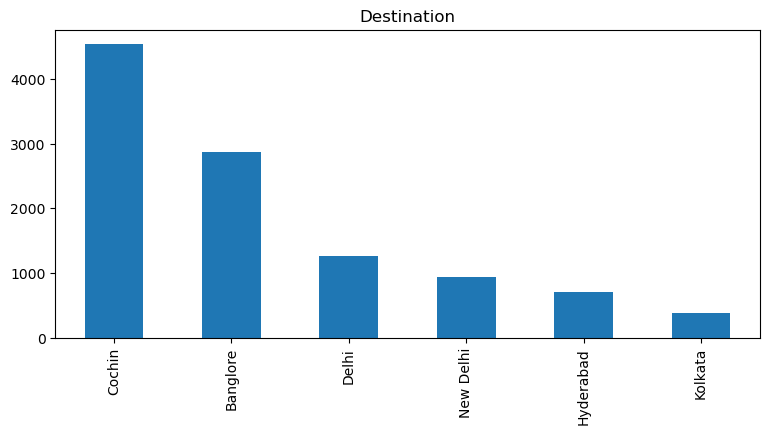

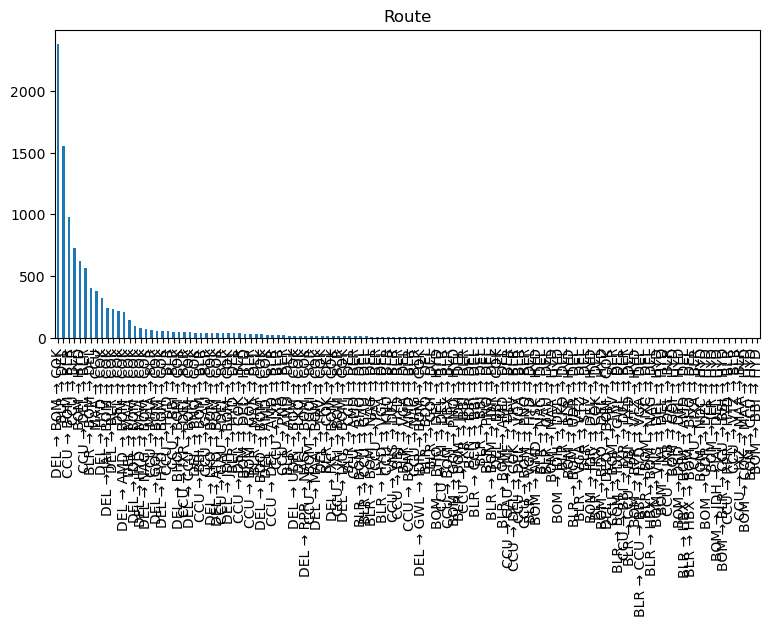

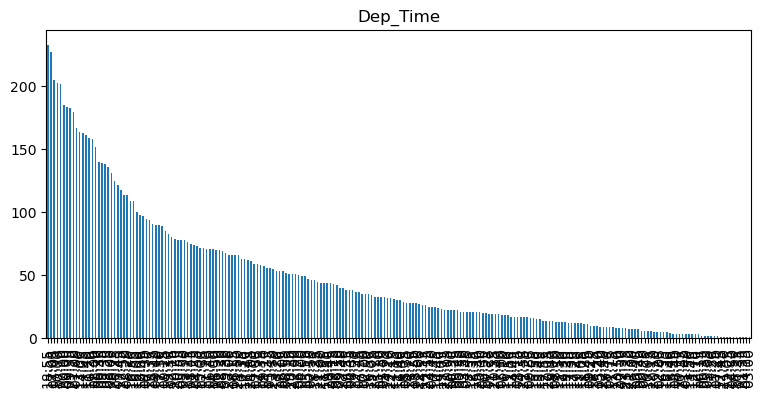

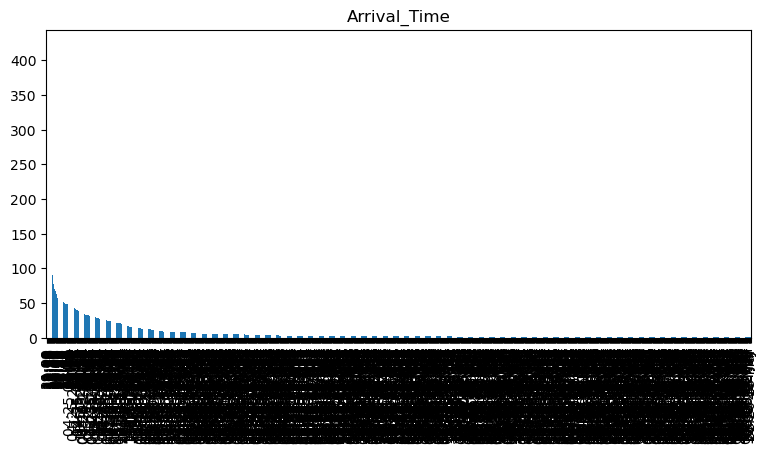

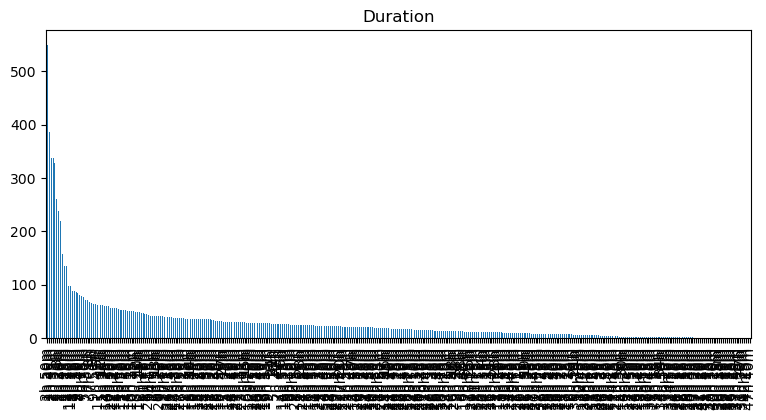

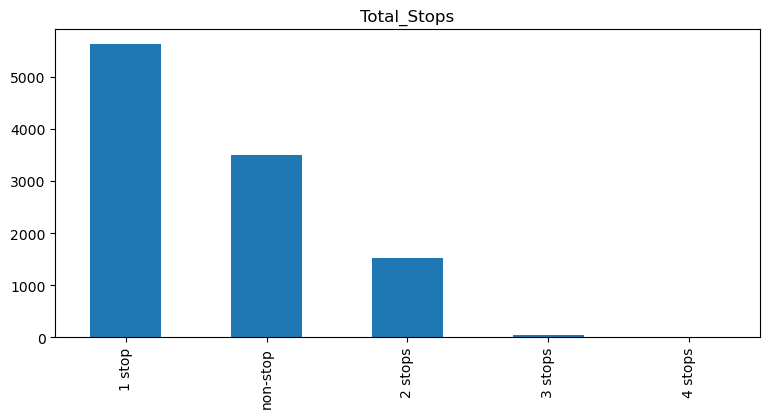

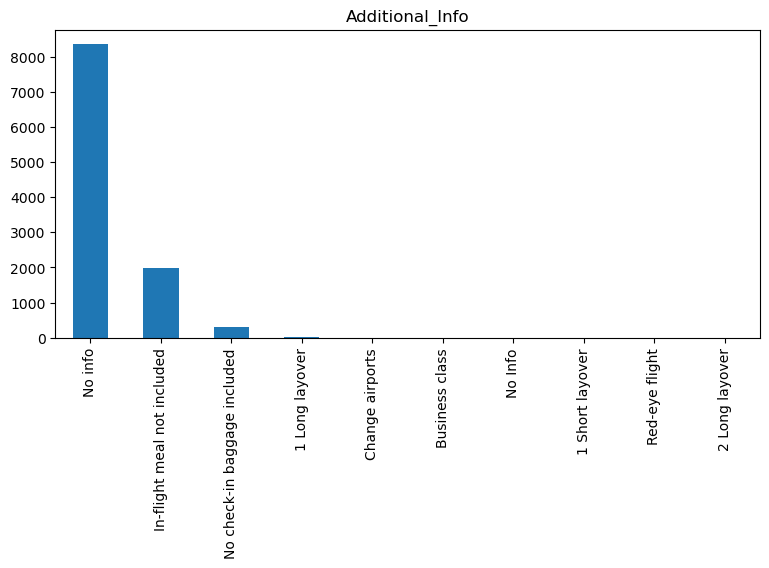

In [17]:
#plotting a barchart for each of the categorical value
for column in category_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [18]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [19]:
#Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. We split the data in route column, and store all the city names in separate columns –

data.Route=data.Route.str.split('→')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10682, dtype: object

In [20]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [21]:
#We now split the Date column to extract the ‘Date’, ‘Month’ and ‘Year’ values, and store them in new columns in our dataframe.

data.Date_of_Journey=data.Date_of_Journey.str.split('/')

In [22]:
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10682, dtype: object

In [23]:
#Treating the data_column


data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [24]:
#In the similar manner, we split the Dep_time column, and create separate columns for departure hours and minutes –
data.Dep_Time=data.Dep_Time.str.split(':')

In [25]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

Further, for the arrival date and arrival time separation, we split the ‘Arrival_Time’ column, and create ‘Arrival_date’ column. We also split the time and divide it into ‘Arrival_time_hours’ and ‘Arrival_time_minutes’, similar to what we did with the ‘Dep_time’ column –

In [26]:

data.Arrival_Time=data.Arrival_Time.str.split(' ')


In [27]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [28]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')


In [29]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [30]:
#Next, we divide the ‘Duration’ column to ‘Travel_hours’ and ‘ Travel_mins’

data.Duration=data.Duration.str.split(' ')

In [31]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('m')
data.Travel_Mins=data.Travel_Mins.str[0]

In [32]:
#We also treat the ‘Total_stops’ column, and replace non-stop flights with 0 value and extract the integer part of the ‘Total_Stops’ column –
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]


In [33]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [34]:
data.Additional_Info.replace('No Info','No info',inplace=True)

In [35]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              0
Additional_Info          0
Price                    0
City1                    0
City2                    0
City3                 3491
City4                 9116
City5                10636
City6                10681
Date                     0
Month                    0
Year                     0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [36]:
#We also drop some columns like ‘city6’ and ‘city5’, since majority of the data in these columns was NaN(null)
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [37]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1, inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

### Replacing The Missing Values

In [38]:
#Checking Null Values
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
City1                   0
City2                   0
City3                3491
Date                    0
Month                   0
Year                    0
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [39]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             0
Additional_Info         0
Price                   0
City1                   0
City2                   0
City3                3491
Date                    0
Month                   0
Year                    0
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [40]:
#filling City3 as None, the missing values are less
data['City3'].fillna('None',inplace=True)

In [41]:
#filling Arrival_Date as Departure_Date
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [42]:
#filling Travel_Mins as Zero(0)
data['Travel_Mins'].fillna(0,inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   City1              10682 non-null  object
 7   City2              10682 non-null  object
 8   City3              10682 non-null  object
 9   Date               10682 non-null  object
 10  Month              10682 non-null  object
 11  Year               10682 non-null  object
 12  Dep_Time_Hour      10682 non-null  object
 13  Dep_Time_Mins      10682 non-null  object
 14  Arrival_date       10682 non-null  object
 15  Arrival_Time_Hour  10682 non-null  object
 16  Arrival_Time_Mins  10682 non-null  objec

In [44]:
#changing the numerical columns from object to int
#data.Total_Stops=data.Total_Stops.astype('int64')
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype("int64")
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
#data.Travel_Hours=data.Travel_Hours.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

During this step, we face issue converting the ‘Travel_hours’ column, saying that the column has data as ‘5m’, which is not allowing its conversion to ‘int’.

In [45]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,BOM,GOI,PNQ,6,3,2019,16,50,6,16,55,5m,0


The data signifies that the flight time is ‘5m’, which is obviously wrong as the plane cannot fly from BOMBAY->GOA->PUNE->HYDERABAD in 5 mins! (The flight has ‘Total_stops’ as 2)

We then convert the ‘Travel_hours’ column to ‘int’ data type, and the operation happens successfully.

We now have a treated dataset with 10682 rows and 16 columns (15 independent and 1 dependent variable).

We create separate lists of categorical columns and numerical columns for plotting and analyzing the data –

In [46]:
data.drop(index=6474,inplace=True,axis=0)

In [47]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [48]:
#Creating list of Different types of columns
categorical=['Airline','Source','Destination','Additional_Info','City1']
numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour',
           'Arrival_Time_Mins','Travel_Hours','Travel_Mins']

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\

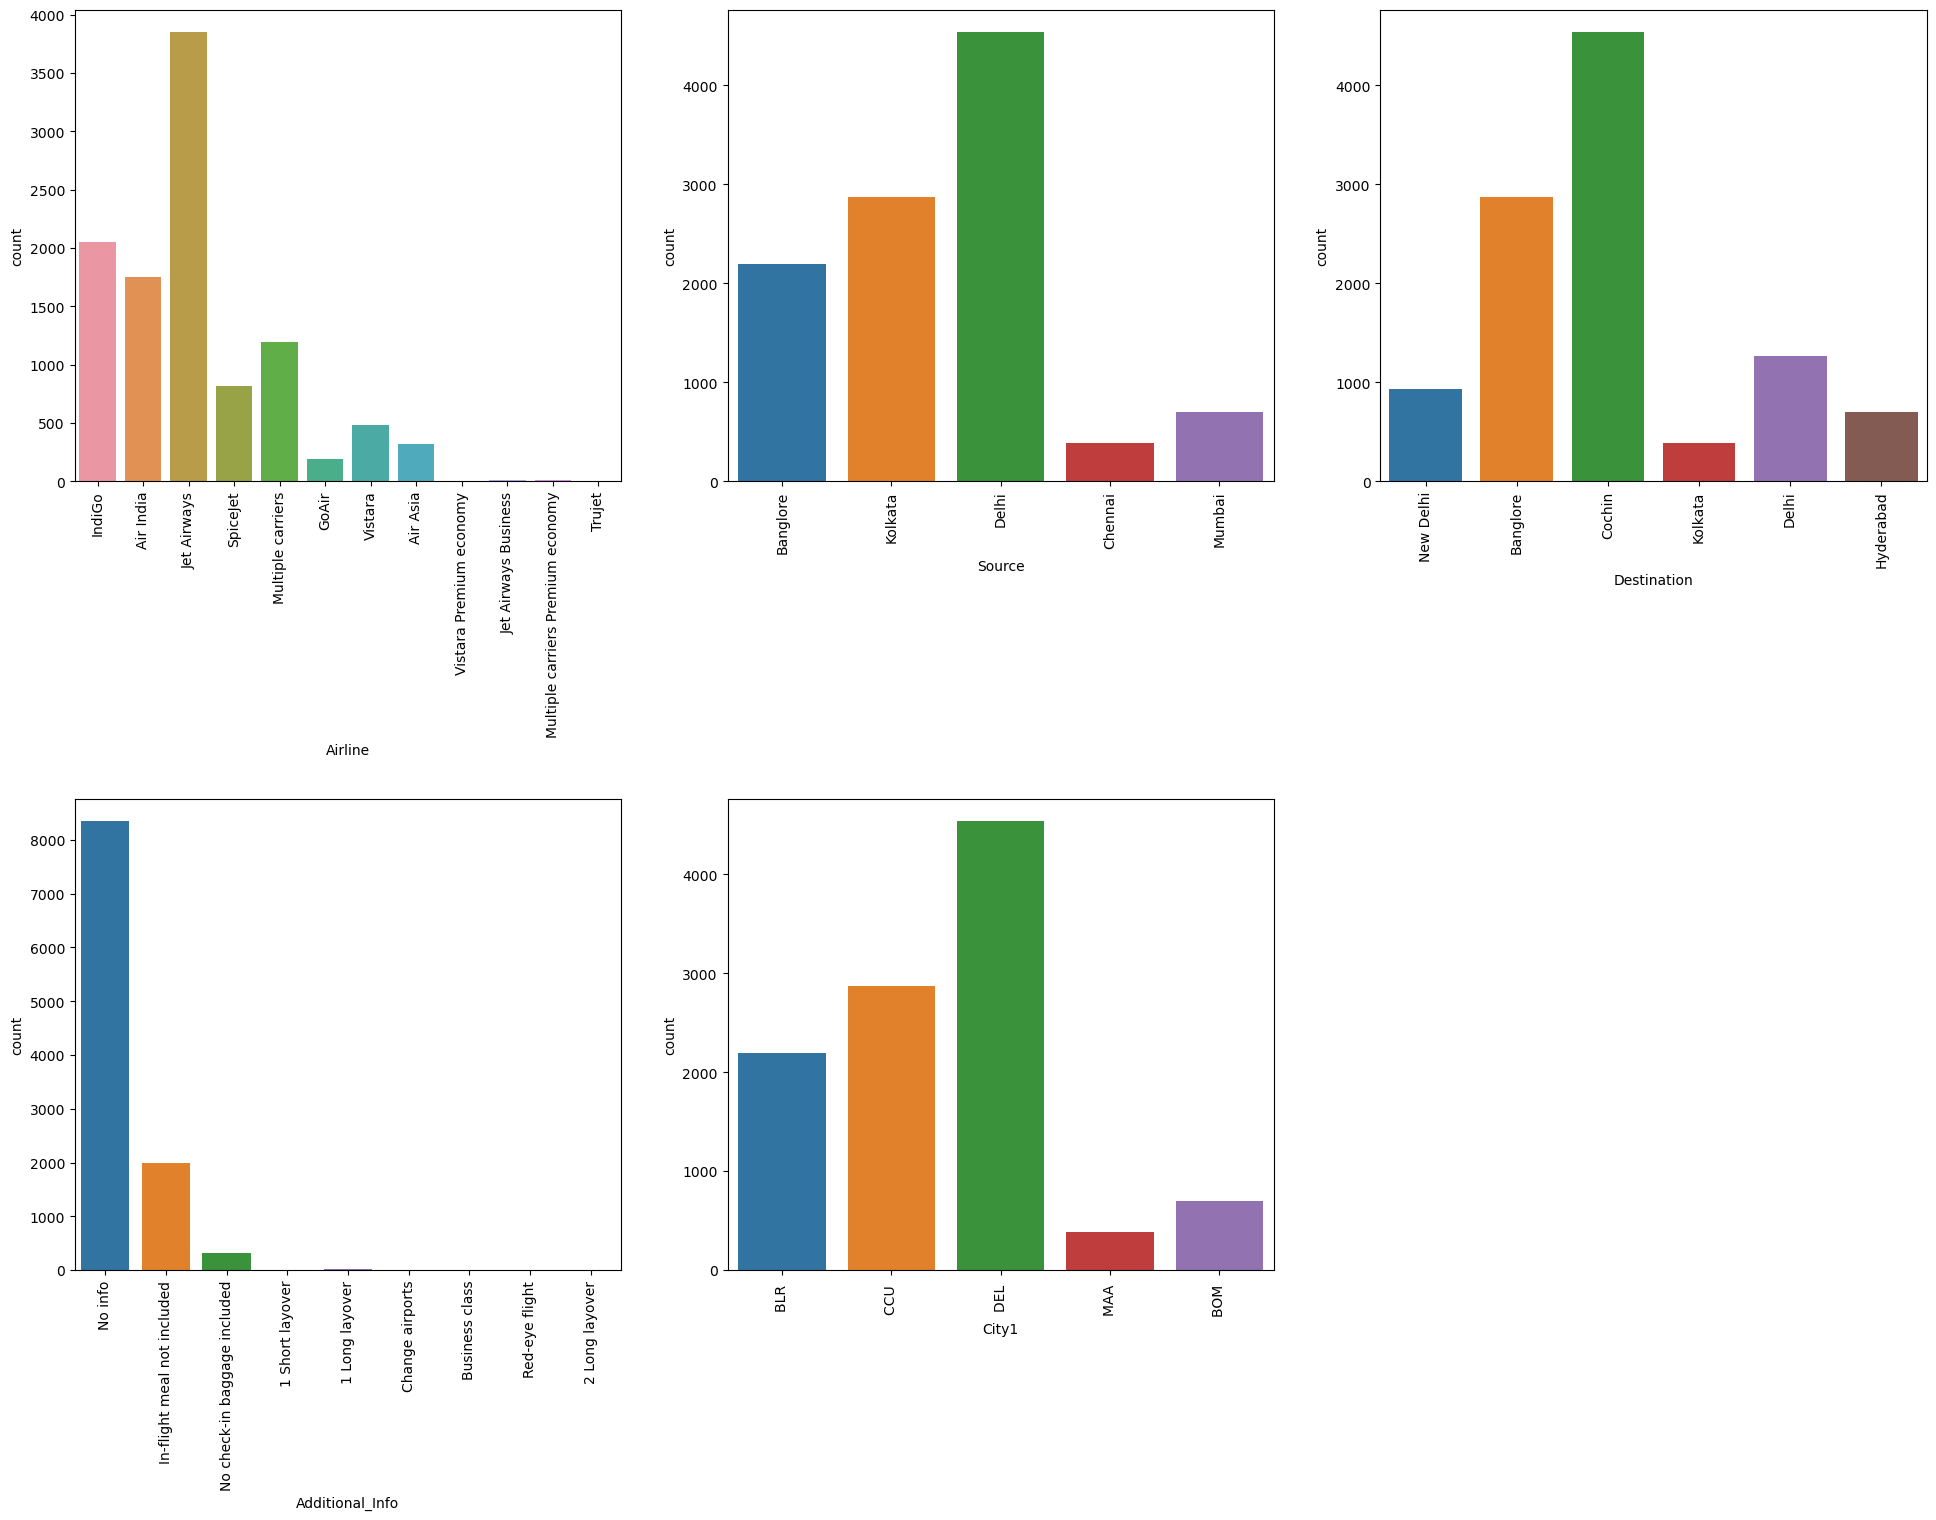

In [49]:
#plotting Countplots for Categorical Data

import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

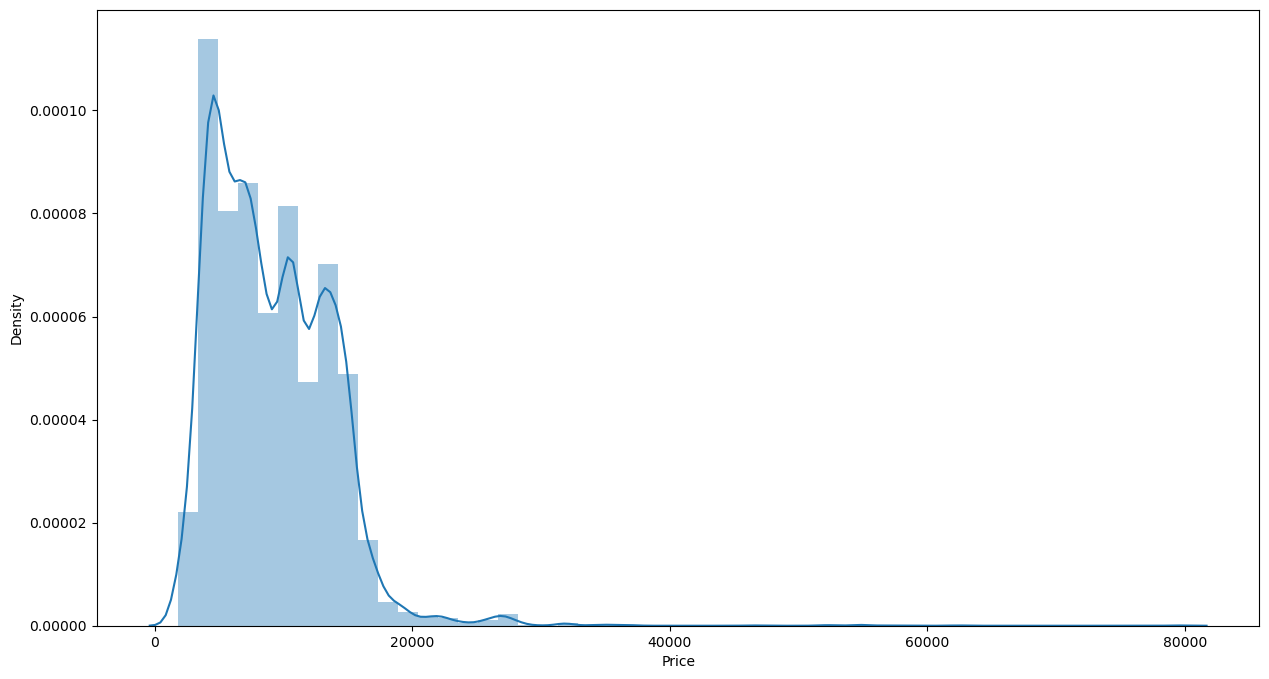

In [50]:
#Distribution of 'PRICE' Column
plt.figure(figsize=(15,8))
sns.distplot(data.Price)


Majority of the flights have price range between 1759–20k, and number of flights having prices greater than 20k are quite less. Price range is skewed towards right.

We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’.

In [51]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'City1', 'City2', 'City3', 'Date', 'Month', 'Year',
       'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Mins', 'Travel_Hours', 'Travel_Mins'],
      dtype='object')

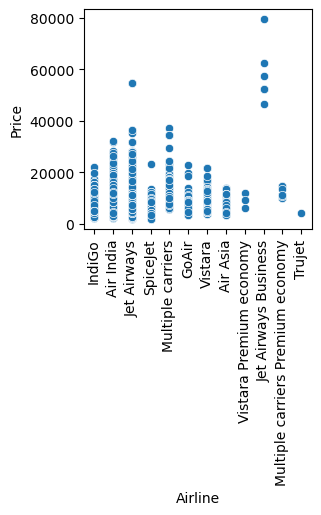

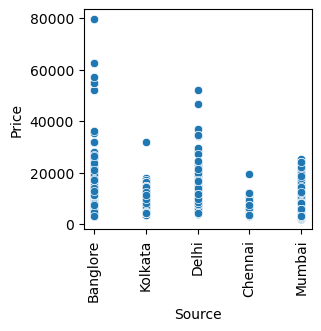

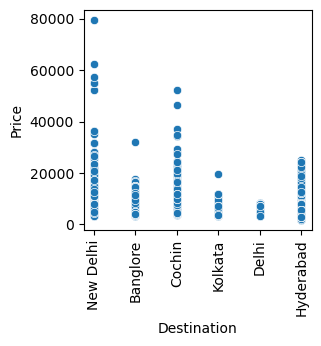

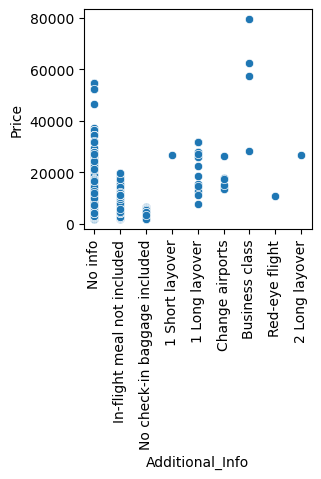

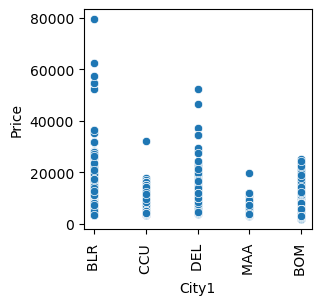

In [52]:
#Checking the relation of Price with Categorical data

import seaborn as sns
c=1

for i in categorical:
    plt.figure(figsize = (10,20))

    plt.subplot(6,3,c)
    
    sns.scatterplot(x=data[i],y=data.Price)
    plt.xticks(rotation=90)
    #plt.tight_layout(pad=3.0)
    c=c+1
    plt.show()
    

In [53]:
#Checking Flight with high Prices
data[data.Price>50000]
data.head()
pd.set_option('display.max_columns',25)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR,DEL,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU,IXR,BBI,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL,LKO,BOM,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU,NAG,BLR,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR,NAG,DEL,1,3,2019,16,50,1,21,35,4,45


In [54]:
data['Year'].max()

2019

<AxesSubplot:>

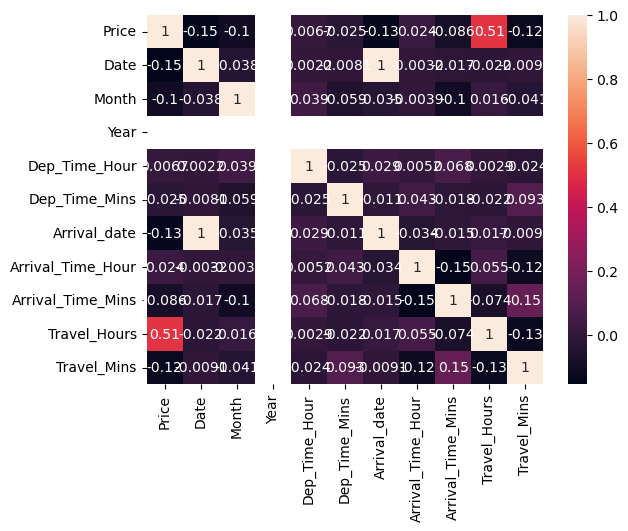

In [55]:
sns.heatmap(data.corr(),annot=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10681 non-null  object
 1   Source             10681 non-null  object
 2   Destination        10681 non-null  object
 3   Total_Stops        10681 non-null  object
 4   Additional_Info    10681 non-null  object
 5   Price              10681 non-null  int64 
 6   City1              10681 non-null  object
 7   City2              10681 non-null  object
 8   City3              10681 non-null  object
 9   Date               10681 non-null  int64 
 10  Month              10681 non-null  int64 
 11  Year               10681 non-null  int64 
 12  Dep_Time_Hour      10681 non-null  int64 
 13  Dep_Time_Mins      10681 non-null  int64 
 14  Arrival_date       10681 non-null  int64 
 15  Arrival_Time_Hour  10681 non-null  int64 
 16  Arrival_Time_Mins  10681 non-null  int64

In [57]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR,DEL,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU,IXR,BBI,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL,LKO,BOM,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU,NAG,BLR,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR,NAG,DEL,1,3,2019,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,CCU,BLR,None,9,4,2019,19,55,9,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,CCU,BLR,None,27,4,2019,20,45,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,BLR,DEL,None,27,4,2019,8,20,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,BLR,DEL,None,1,3,2019,11,30,1,14,10,2,40


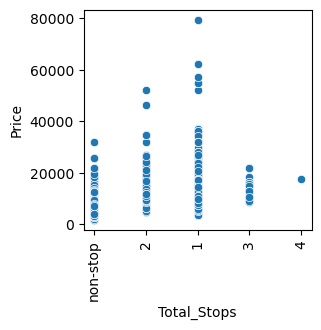

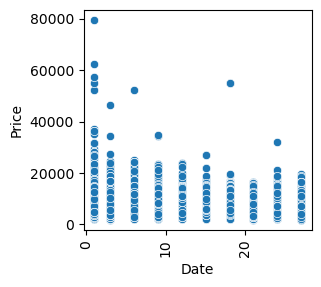

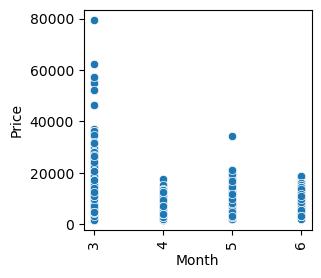

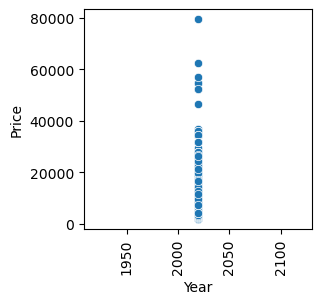

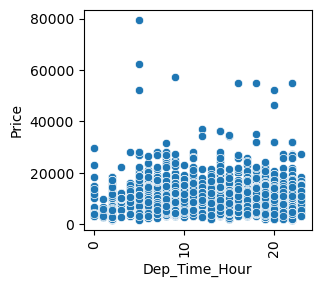

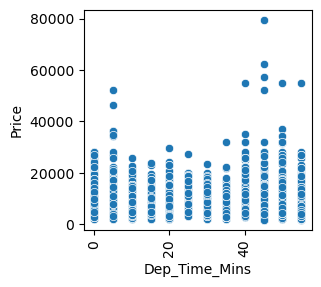

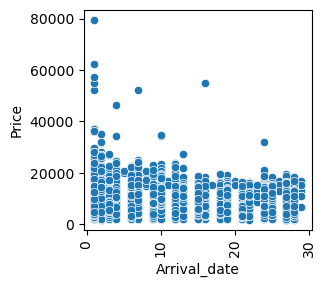

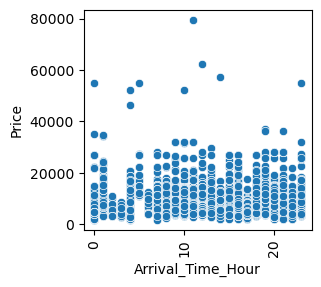

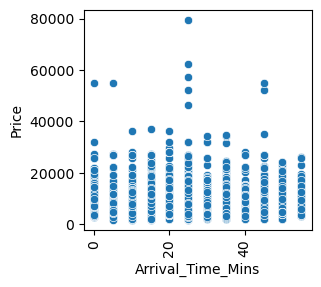

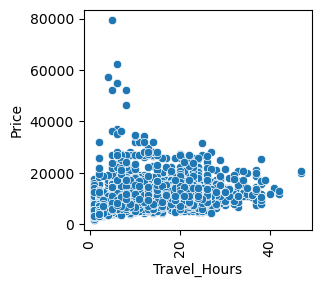

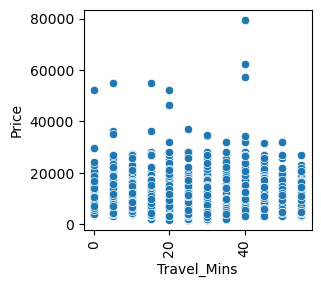

In [58]:
#Checking Relation Price with Numerical values
c=1

for i in numerical:
    plt.figure(figsize=(10,20))
    plt.subplot(6,3,c)
    sns.scatterplot(x = data[i], y=data.Price)
    plt.xticks(rotation=90)
    #plt.tight_layout(pad=3.0)
    c=c+1
    plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

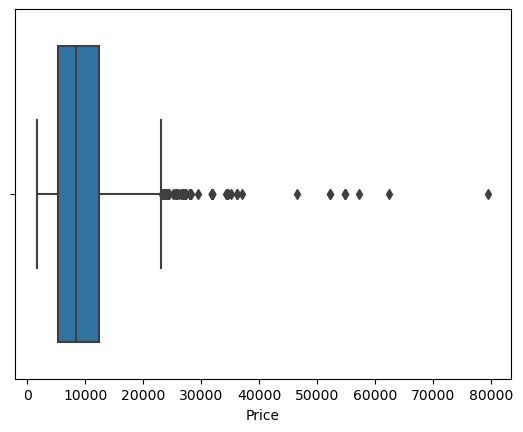

In [59]:
# Detecting the Outliers
import seaborn as sns
sns.boxplot(data['Price'])
    

### Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [61]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1	=le.fit_transform(data.City1	)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,0,13,29,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,2,25,1,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,3,32,4,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,2,34,3,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,0,34,8,1,3,2019,16,50,1,21,35,4,45


### Output  Columns

In [62]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,0,13,29,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,2,25,1,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,3,32,4,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,2,34,3,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,0,34,8,1,3,2019,16,50,1,21,35,4,45


In [63]:
data = data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price']]

In [64]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [65]:
### Scaling the Data

In [66]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [67]:
data1 = ss.fit_transform(data)

In [68]:
data1 = pd.DataFrame(data1,columns=data.columns)
data1.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,-0.410934,-1.658354,2.416648,1.237192,-1.467619,0.0,1.654162,-0.234832,0.955658,-1.800328,-0.889941,-1.125483
1,-1.261305,0.890262,-0.973718,-1.475375,0.250165,0.0,-1.303018,1.363790,-1.524701,-0.050871,-0.586988,-0.308932
2,0.014251,0.040723,-0.295645,-0.531874,1.109057,0.0,-0.607211,0.031605,-0.461690,-1.362964,0.018919,1.040057
3,-0.410934,0.890262,-0.973718,-0.178060,0.250165,0.0,0.958355,-1.034142,-0.225465,1.407010,0.321872,-0.622106
4,-0.410934,-1.658354,2.416648,-1.475375,-1.467619,0.0,0.610452,1.363790,-1.524701,1.115434,0.624825,0.914267


In [69]:
y = data1['Price']
x = data1.drop(columns=['Price'],axis=1)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [71]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10609,0.014251,1.739800,1.060501,0.529566,0.250165,0.0,-0.955114,-1.034142,0.483209,-0.779812,0.321872
1034,1.714993,0.040723,-0.295645,1.237192,-0.608727,0.0,0.436500,1.097353,1.191883,1.261222,-1.192894
8122,0.014251,0.040723,-0.295645,1.591005,1.109057,0.0,-1.824873,-0.501269,1.546220,-0.196659,0.624825
4779,0.014251,0.890262,-0.973718,-1.475375,-0.608727,0.0,-1.129066,0.298042,-1.524701,0.678070,-0.586988
3207,-0.410934,0.890262,-0.973718,1.237192,0.250165,0.0,0.958355,-1.034142,1.191883,1.407010,0.321872


In [72]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()


In [73]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)
        
        print("R2 score is",r2_score(y_test,y_pred))
        print("R2 for train data",r2_score(y_train, i.predict(x_train)))
        print("Mean Absolute Error is",mean_absolute_error(y_pred,y_test))
        print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
        print("Root Mean Sqaured Error is", (mean_squared_error(y_pred,y_test,squared=False)))


RandomForestRegressor()
R2 score is 0.825363418701522
R2 for train data 0.9508449610376644
Mean Absolute Error is 0.2551937610045893
Mean Squared Error is 0.17341869125349313
Root Mean Sqaured Error is 0.41643569882215087
GradientBoostingRegressor()
R2 score is 0.76474670914698
R2 for train data 0.7333243455087604
Mean Absolute Error is 0.36403223056908257
Mean Squared Error is 0.2336126687173283
Root Mean Sqaured Error is 0.4833349446474239
AdaBoostRegressor()
R2 score is 0.26804751807280003
R2 for train data 0.29093967928830355
Mean Absolute Error is 0.7084022559724104
Mean Squared Error is 0.7268479520829202
Root Mean Sqaured Error is 0.8525537825163408


In [74]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())
    

RandomForestRegressor() 0.7921308782091256
RandomForestRegressor() 0.7935024687612362
RandomForestRegressor() 0.8022891605725642


In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],
            'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)




Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [77]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

gb_res.fit(x_train,y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [78]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.9323377217236306
test accuracy 0.7599743725604416


In [79]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(gb,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7266663295785736
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7288948898589234
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7281685827315737


In [80]:
gb=GradientBoostingRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
gb.fit(x_train,y_train)
y_train_pred=gb.predict(x_train)
y_test_pred=gb.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))


train accuracy 0.636247261013868
test accuracy 0.2669279232461198


In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 Score is',r2_score(y_test,y_pred))
        print('R2 Score for train data',r2_score(y_train,i.predict(x_train)))
        print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
        print('Root Mean Squared Error is',(mean_squared_error(y_test,y_pred,squared=False)))
        

KNeighborsRegressor()
R2 Score is 0.7359497134748201
R2 Score for train data 0.7901906151489018
Mean Absolute Error is 0.3540847028717021
Mean Squared Error is 0.2622088383420826
Root Mean Squared Error is 0.5120633147786342
SVR()
R2 Score is 0.6399736388140888
R2 Score for train data 0.5969176412610044
Mean Absolute Error is 0.4082060405291265
Mean Squared Error is 0.35751558985747445
Root Mean Squared Error is 0.5979260739066949


In [82]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.8817766747376883
test accuracy 0.6866706442995915


In [83]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(knn,x,y,cv=i)
    print(knn,cv.mean())

KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6293446783470187
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.645079031211783
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6650001944459913


In [84]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [85]:
predicted_values

,Actual,Predicted
4830,-0.349272,-0.455760
3771,-0.251459,-0.171648
1523,-0.677410,0.638830
3393,1.562086,0.826648
4169,-0.232157,-0.719485
...,...,...
9869,-0.968245,-0.614949
10061,-0.354477,-0.636420
6911,-0.348404,-0.348404
8616,1.098398,1.138303


In [86]:
prices=rfr.predict(x_test)

In [87]:
price_list=pd.DataFrame({'Price':prices})

In [88]:
price_list

,Price
0,-0.587123
1,-0.112440
2,0.415611
3,0.837058
4,-0.642249
...,...
2132,-0.747332
2133,-0.438756
2134,-0.235302
2135,0.814738


In [89]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))


In [90]:
pwd

'D:\\flight\\Training'

In [91]:
#https://medium.com/analytics-vidhya/regression-flight-price-prediction-6771fc4d1fb3

In [92]:
#https://nevonprojects.com/flight-ticket-price-predictor-using-python/

In [93]:
#https://www.twilio.com/blog/how-run-flask-application#:~:text=The%20flask%20run%20method%20is%20the%20newest%20solution,.%20A%20general%20utility%20script%20for%20Flask%20applications.